In [1]:
import glob #to read the files
import json #to work if .json
import numpy as np #to math
import pandas as pd #to save the data
import math #to convertion calculus
from astropy.time import Time #to time converting
from astropy import units #time correction
from astropy.coordinates import SkyCoord #time correction
from scipy import interpolate #to interpolate the wavelength and flux
from tabulate import tabulate #to export in table format
from scipy.interpolate import interp1d
#import scipy.optimize as opt
from scipy import optimize
from scipy import signal
import os.path
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy import stats
import os.path 
import sncosmo

In [2]:
save_path = '/home/joao/Documentos/templates'

In [3]:
kernel = 10.0 * RBF(length_scale=20.0, length_scale_bounds=(5, 25)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

In [4]:
csp = sncosmo.get_magsystem('csp')
ab = sncosmo.get_magsystem('ab')
vega = sncosmo.get_magsystem('vega')

In [5]:
%run ./functions.ipynb

In [6]:
hist = []
t0_values = []
max_namesV = []
max_namesr = []

In [7]:
sn_names = glob.glob("*2001bf.json")

In [8]:
len(sn_names)

1

In [9]:
maxvaluesV = []
maxvaluesr = []

In [10]:
for j in range(0,len(sn_names)):  
    
    name = sn_names[j]

    print(name)
    
    with open(name, "r") as read_file:
        data = json.load(read_file)

    url = name
    if url.endswith('.json'):
        url = url[:-5]

    redshift = redshift_value(data[url])

    if redshift is not None:
        
        magV = []
        timeV = []
        systemV = []
        
        magr = []
        timer = []
        systemr = []

        for i in range(0,len(data[url]["photometry"])):

            if "band" in data[url]["photometry"][i]:

                if data[url]["photometry"][i]["band"] == "V":
                    
                    if "system" in data[url]["photometry"][i]:
                        
                        systemV.append(data[url]["photometry"][i]["system"])
                        magV.append(float(data[url]["photometry"][i]["magnitude"]))
                        timeV.append(float(data[url]["photometry"][i]["time"]))
                    
                    else:
                        
                        systemV.append("w")
                        magV.append(float(data[url]["photometry"][i]["magnitude"]))
                        timeV.append(float(data[url]["photometry"][i]["time"]))
                        
                if data[url]["photometry"][i]["band"] == "v":
                    
                    if "system" in data[url]["photometry"][i]:
                        
                        systemV.append(data[url]["photometry"][i]["system"])
                        magV.append(float(data[url]["photometry"][i]["magnitude"]))
                        timeV.append(float(data[url]["photometry"][i]["time"]))
                    
                    else:
                        
                        systemV.append("w")
                        magV.append(float(data[url]["photometry"][i]["magnitude"]))
                        timeV.append(float(data[url]["photometry"][i]["time"]))
                        
                        
                        
                        
                        
                if data[url]["photometry"][i]["band"] == "R":
                    
                    if "system" in data[url]["photometry"][i]:
                        
                        systemr.append(data[url]["photometry"][i]["system"])
                        magr.append(float(data[url]["photometry"][i]["magnitude"]))
                        timer.append(float(data[url]["photometry"][i]["time"]))
                    
                    else:
                        
                        systemr.append("w")
                        magr.append(float(data[url]["photometry"][i]["magnitude"]))
                        timer.append(float(data[url]["photometry"][i]["time"]))
                        
                        
                if data[url]["photometry"][i]["band"] == "r":
                    
                    if "system" in data[url]["photometry"][i]:
                        
                        systemr.append(data[url]["photometry"][i]["system"])
                        magr.append(float(data[url]["photometry"][i]["magnitude"]))
                        timer.append(float(data[url]["photometry"][i]["time"]))
                    
                    else:
                        
                        systemr.append("w")
                        magr.append(float(data[url]["photometry"][i]["magnitude"]))
                        timer.append(float(data[url]["photometry"][i]["time"]))
                                                
        
        if len(timeV) > 3:
    
            #maxvalues.append(min(mag))
            
            ntimeV = []
            nmagV = []
            nsysV = []
            
            ntimer = []
            nmagr = []
            nsysr = [] 
            
            for i in range(0,len(magV)):

                if np.abs(timeV[i]- min(timeV)) < 100:
                        
                    if systemV[i] == "CSP":                        
                        
                        nmagV.append(csp.band_mag_to_flux(magV[i], 'cspv9844')*(1+redshift))
                        ntimeV.append([timeV[i]])
                        
                    if systemV[i] == "AB":
                        #print("ab")
                        
                        nmagV.append(ab.band_mag_to_flux(magV[i], 'cspv9844')*(1+redshift))
                        ntimeV.append([timeV[i]])
                        
                    if systemV[i] == "Vega":
                        
                        #print("vega")
                        nmagV.append(vega.band_mag_to_flux(magV[i], 'cspv9844')*(1+redshift))
                        ntimeV.append([timeV[i]])   
                        
                    if systemV[i] == "w":
                        
                        #print("w")
                        nmagV.append(csp.band_mag_to_flux(magV[i], 'cspv9844')*(1+redshift))
                        ntimeV.append([timeV[i]])                     

                        

            for i in range(0,len(magr)):

                if np.abs(timer[i]- min(timer)) < 100:
                        
                    if systemr[i] == "CSP":                        
                        
                        nmagr.append(csp.band_mag_to_flux(magr[i], 'cspr')*(1+redshift))
                        ntimer.append([timer[i]])
                        
                    if systemr[i] == "AB":
                        #print("ab")
                        
                        nmagr.append(ab.band_mag_to_flux(magr[i], 'cspr')*(1+redshift))
                        ntimer.append([timer[i]])
                        
                    if systemr[i] == "Vega":
                        
                        #print("vega")
                        nmagr.append(vega.band_mag_to_flux(magr[i], 'cspr')*(1+redshift))
                        ntimer.append([timer[i]])   
                        
                    if systemr[i] == "w":
                        
                        #print("w")
                        nmagr.append(csp.band_mag_to_flux(magr[i], 'cspr')*(1+redshift))
                        ntimer.append([timer[i]])                     
                                      
                    #print(np.abs(time[i][0] - min(time[i])))    
                    
                    
                
                
            if len(nmagV) > 3:
                
                gpV = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(ntimeV, nmagV)

                X_V = np.linspace(min(ntimeV)[0], max(ntimeV)[0], 1000)
                #print(X_)
                y_meanV,  y_cov = gpV.predict(X_V[:, np.newaxis], return_cov=True)

                y_meanV = list(y_meanV)

                idxV = y_meanV.index(max(y_meanV))  
                
                
                if idxV > 2: 
                    
                    maxvaluesV.append(max(y_meanV))
                    t0_values.append([X_V[idxV], sn_names[j]])
                    max_namesV.append(sn_names[j])
                            
                
                
            if len(nmagr) > 3:
                
                gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(ntimer, nmagr)

                X_r = np.linspace(min(ntimer)[0], max(ntimer)[0], 1000)
                #print(X_)
                y_meanr = gpr.predict(X_r[:, np.newaxis])

                y_meanr = list(y_meanr)

                idxr = y_meanr.index(max(y_meanr))  
                
                
                if idxr > 2: 
                    
                    maxvaluesr.append(max(y_meanr))
                    max_namesr.append(sn_names[j])          

SN2001bf.json
0.015501


In [11]:
X_V

array([52035.48      , 52035.57585586, 52035.67171171, 52035.76756757,
       52035.86342342, 52035.95927928, 52036.05513514, 52036.15099099,
       52036.24684685, 52036.3427027 , 52036.43855856, 52036.53441441,
       52036.63027027, 52036.72612613, 52036.82198198, 52036.91783784,
       52037.01369369, 52037.10954955, 52037.20540541, 52037.30126126,
       52037.39711712, 52037.49297297, 52037.58882883, 52037.68468468,
       52037.78054054, 52037.8763964 , 52037.97225225, 52038.06810811,
       52038.16396396, 52038.25981982, 52038.35567568, 52038.45153153,
       52038.54738739, 52038.64324324, 52038.7390991 , 52038.83495495,
       52038.93081081, 52039.02666667, 52039.12252252, 52039.21837838,
       52039.31423423, 52039.41009009, 52039.50594595, 52039.6018018 ,
       52039.69765766, 52039.79351351, 52039.88936937, 52039.98522523,
       52040.08108108, 52040.17693694, 52040.27279279, 52040.36864865,
       52040.4645045 , 52040.56036036, 52040.65621622, 52040.75207207,
      

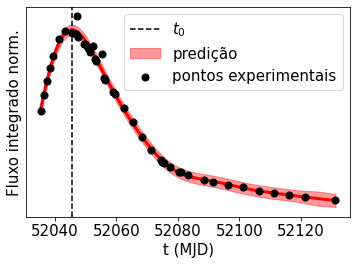

In [12]:
plt.rcParams.update({"font.size": 15})
plt.fill_between(X_V, y_meanV/max(nmagV) - np.sqrt(np.diag(y_cov))/max(nmagV), y_meanV/max(nmagV) + np.sqrt(np.diag(y_cov))/max(nmagV), alpha=0.4, color='r', label = 'predição')
plt.scatter(ntimeV, nmagV/max(nmagV), c='k', s=50, zorder=10, edgecolors=(0, 0, 0), label = 'pontos experimentais')
plt.plot(X_V, y_meanV/max(nmagV), 'r', lw=3, zorder=9)
plt.axvline(x=X_V[idxV], linestyle="--", c="k", label="$t_0$")
plt.legend()
plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.15)
plt.yticks([])
plt.xlabel("t (MJD)")
plt.ylabel("Fluxo integrado norm.")
plt.savefig("/home/joao/Desktop/curvadeluzSN2001bf.jpg", dpi = 200)   # save the figure to file

In [13]:
maxvaluesV

[0.6154389997598522]

In [14]:
maximosV = []
maximosr = []
nome = []

In [15]:
for i in range(0, len(sn_names)):
    
    if sn_names[i] in max_namesV:
    
        if sn_names[i] in max_namesr:

            nome.append(sn_names[i])
            
            idx_V = max_namesV.index(sn_names[i])

            maximosV.append(maxvaluesV[idx_V])
        
            idx_r = max_namesr.index(sn_names[i])

            maximosr.append(maxvaluesr[idx_r])
        
    if sn_names[i] in max_namesV:
    
        if sn_names[i] not in max_namesr:
            
            nome.append(sn_names[i])
            
            idx_V = max_namesV.index(sn_names[i])

            maximosV.append(maxvaluesV[idx_V])

            maximosr.append(-9999)
            
            
            
    if sn_names[i] not in max_namesV:
    
        if sn_names[i] in max_namesr:
            
            nome.append(sn_names[i])
            
            idx_r = max_namesr.index(sn_names[i])

            maximosr.append(maxvaluesr[idx_r])

            maximosV.append(-9999)

In [16]:
maximosV

[0.6154389997598522]

In [17]:
names = []
zerotime = []

In [18]:
for i in range(0,len(t0_values)):
    
    zerotime.append(t0_values[i][0])
    names.append(t0_values[i][1][:-5])

In [19]:
names

['SN2001bf']

In [20]:
for i in range(0, len(nome)):
    
    nome[i] = nome[i][:-5]

In [21]:

table = []
for l in range(0,len(names)):
    table.append((names[l],zerotime[l]))

name_of_file = "t0_values"

completeName = os.path.join(save_path, name_of_file+".txt")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


FileNotFoundError: [Errno 2] No such file or directory: '/home/joao/Documentos/templates/t0_values.txt'

In [ ]:

table = []
for l in range(0,len(nome)):
    table.append((nome[l], maximosV[l], maximosr[l]))

name_of_file = "max_values"

completeName = os.path.join(save_path, name_of_file+".txt")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()